In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine
import pymc3 as pm
import seaborn as sns

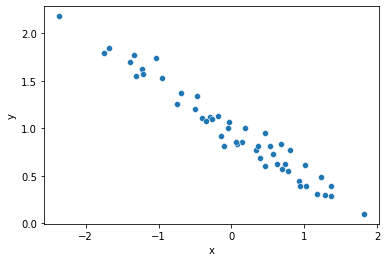

In [6]:
N = 50
x = np.random.normal(0, 1, N)
y = 1 - 0.5 * x + np.random.normal(0, 0.1, N)
data = pd.DataFrame({"x": x, "y": y})

sns.scatterplot(data=data, x="x", y="y");

In [18]:
with pm.Model() as m1:
    a = pm.Normal("a", 0, 10)
    b = pm.Normal("b", 0, 10)
    mu = a + b * data.x
    sigma = pm.HalfNormal("sigma", 5)
    y = pm.Normal("y", mu, sigma, observed=data.y)

    trace_1 = pm.sample(draws=100, tune=100, random_seed=123, chains=1)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, b, a]


Sampling 1 chain for 100 tune and 100 draw iterations (100 + 100 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.9258450554514255, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [27]:
with pm.Model() as m2:
    a = pm.Normal("a", 0, 10)
    b = pm.Normal("b", 0, 10)
    mu = a + b * data.x
    sigma = pm.HalfNormal("sigma", 5)
    y = pm.Normal("y", mu, sigma, observed=data.y)

    trace_2 = pm.sample(draws=100, tune=100, random_seed=456, chains=1)

/usr/local/Caskroom/miniconda/base/envs/speclet/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, b, a]


Sampling 1 chain for 100 tune and 100 draw iterations (100 + 100 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.9277922483669314, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [28]:
az1 = az.from_pymc3(model=m1, trace=trace_1)
az2 = az.from_pymc3(model=m2, trace=trace_2)

In [29]:
merged_az = az.concat([az1, az2], dim="chain")

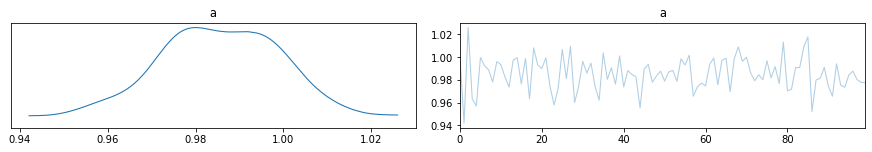

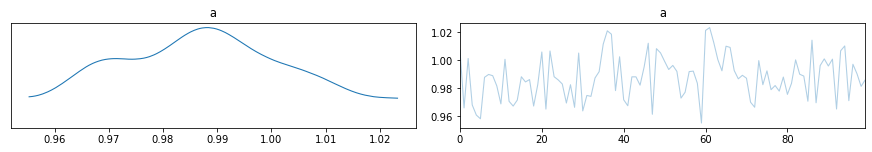

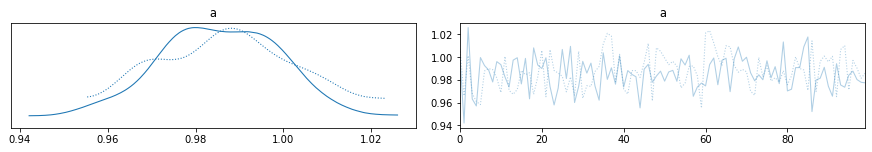

In [30]:
for inf_obj in [az1, az2, merged_az]:
    az.plot_trace(inf_obj, var_names="a")
    plt.show()

In [32]:
a = ["a", "B"]
" ".join(a)

'a B'